<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Packages" data-toc-modified-id="Importing-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Packages</a></span></li><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading data</a></span></li><li><span><a href="#Nifty50-Performance" data-toc-modified-id="Nifty50-Performance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nifty50 Performance</a></span><ul class="toc-item"><li><span><a href="#Basic-stats" data-toc-modified-id="Basic-stats-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Basic stats</a></span></li><li><span><a href="#Timeline" data-toc-modified-id="Timeline-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Timeline</a></span></li><li><span><a href="#Nifty-Yearly-Returns" data-toc-modified-id="Nifty-Yearly-Returns-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Nifty Yearly Returns</a></span></li><li><span><a href="#Nifty-Monthly-Returns" data-toc-modified-id="Nifty-Monthly-Returns-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Nifty Monthly Returns</a></span></li></ul></li><li><span><a href="#Nifty50-vs-Major-World-Indexes" data-toc-modified-id="Nifty50-vs-Major-World-Indexes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Nifty50 vs Major World Indexes</a></span></li><li><span><a href="#Nifty50-vs-Sensex" data-toc-modified-id="Nifty50-vs-Sensex-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Nifty50 vs Sensex</a></span></li><li><span><a href="#Nifty-Sector-Indexes-Performance" data-toc-modified-id="Nifty-Sector-Indexes-Performance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Nifty Sector Indexes Performance</a></span></li><li><span><a href="#Nifty50-vs-Gold" data-toc-modified-id="Nifty50-vs-Gold-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Nifty50 vs Gold</a></span></li><li><span><a href="#Nifty-Market-Capitalization-based-Indexes-Performance" data-toc-modified-id="Nifty-Market-Capitalization-based-Indexes-Performance-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Nifty Market Capitalization-based Indexes Performance</a></span></li><li><span><a href="#Nifty-Broad-Market-Indexes-Performance" data-toc-modified-id="Nifty-Broad-Market-Indexes-Performance-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Nifty Broad Market Indexes Performance</a></span></li><li><span><a href="#Nifty50-vs-Niftri" data-toc-modified-id="Nifty50-vs-Niftri-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Nifty50 vs Niftri</a></span></li><li><span><a href="#References" data-toc-modified-id="References-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>References</a></span><ul class="toc-item"><li><span><a href="#data-sources" data-toc-modified-id="data-sources-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>data sources</a></span></li><li><span><a href="#articles,-blogs" data-toc-modified-id="articles,-blogs-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>articles, blogs</a></span></li></ul></li></ul></div>

#### Importing Packages

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
import math

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 100)

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import matplotlib.ticker as mtick
rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2

import seaborn as sns
sns.set_style("darkgrid")

from helper import *

#### Reading data

In [3]:
## nifty data
nifty_df = reading_data("Nifty50")

## nifty total return index
nifty_tri_index = ['Niftri']

## Indian indexes (other than nifty)
indian_indexes = ["Sensex"]

## global indexes
world_indexes = ["HangSeng", "Nasdaq", "Nikkei", "Shanghai", "Cac", "Dax", "Ftse"]

## nifty sectors indexes
sector_indexes = ["Auto", "Bank", "Energy", "FinService", "FMCG", "Infra", "IT", "Pharma", "Realty"]

## nifty market cap indexes
market_cap_indexes = ["MidCap100", "SmallCap100"]

## nifty other indexes
nifty_indexes = ["NiftyNext50", "Nifty100", "Nifty200", "Nifty500"]

## gold
gold_etf = ["SBIGoldETF"]

In [4]:
indexes_data_dict = {}
indexes = indian_indexes + world_indexes + sector_indexes + market_cap_indexes + nifty_indexes + gold_etf + nifty_tri_index
for index in indexes:
    indexes_data_dict[index] = reading_data(index)

In [5]:
## joining all indexes
indexes_df = nifty_df.copy()
returns_col_lst = [["Nifty50", nifty_df['Nifty50_returns'].iloc[-1]]]

for index in indexes:
    index_df = indexes_data_dict[index]
    returns_col_lst.append([index, index_df[index+"_returns"].iloc[-1]])
    indexes_df = pd.merge(indexes_df, index_df, on='date', how='outer')
indexes_df.set_index('date', inplace=True)
    
## correlation (between indexes) table
correlation_df = indexes_df[[col for col in indexes_df.columns if ("daily_return" in col)]].corr()

## returns (last decade) table
returns_df = pd.DataFrame(returns_col_lst, columns=['Index', 'Absolute Returns (%)']).sort_values('Absolute Returns (%)', ascending=False).reset_index(drop=True)
returns_df["CAGR"] = returns_df["Absolute Returns (%)"].apply(lambda x: round((math.pow((x/100)+1, 1/10) - 1)*100, 2))
returns_df["Correlation (Nifty50)"] = returns_df["Index"].apply(lambda x: correlation_df[correlation_df.index == "Nifty50_daily_return"][x+"_daily_return"][0])
returns_df["Volatility (%)"] = returns_df['Index'].apply(lambda x: round(indexes_df[x+"_daily_return"].std(), 2))


#### Nifty50 Performance

In [6]:
analysis_df = nifty_df.copy()

## enriching prev close price
analysis_df["prev_close"] = analysis_df["Nifty50_close"].shift(1, fill_value=0)

## gain/loss
analysis_df['gain/loss'] = analysis_df.apply(lambda x: "gain" if (x["Nifty50_close"]>=x["prev_close"]) else "lose", axis=1)

##### Basic stats

In [6]:
number_of_days = analysis_df.shape[0]
gains = analysis_df[analysis_df["gain/loss"] == "gain"].shape[0]
losses = analysis_df[analysis_df["gain/loss"] == "lose"].shape[0]

print ("{:<32}: {}".format("Number of days", number_of_days))
print ("{:<32}: {} ({})".format("Gains",  gains, round(gains/number_of_days, 2)))
print ("{:<32}: {} ({})".format("Losses",  losses, round(losses/number_of_days, 2)))

Number of days                  : 2478
Gains                           : 1310 (0.53)
Losses                          : 1168 (0.47)


##### Timeline

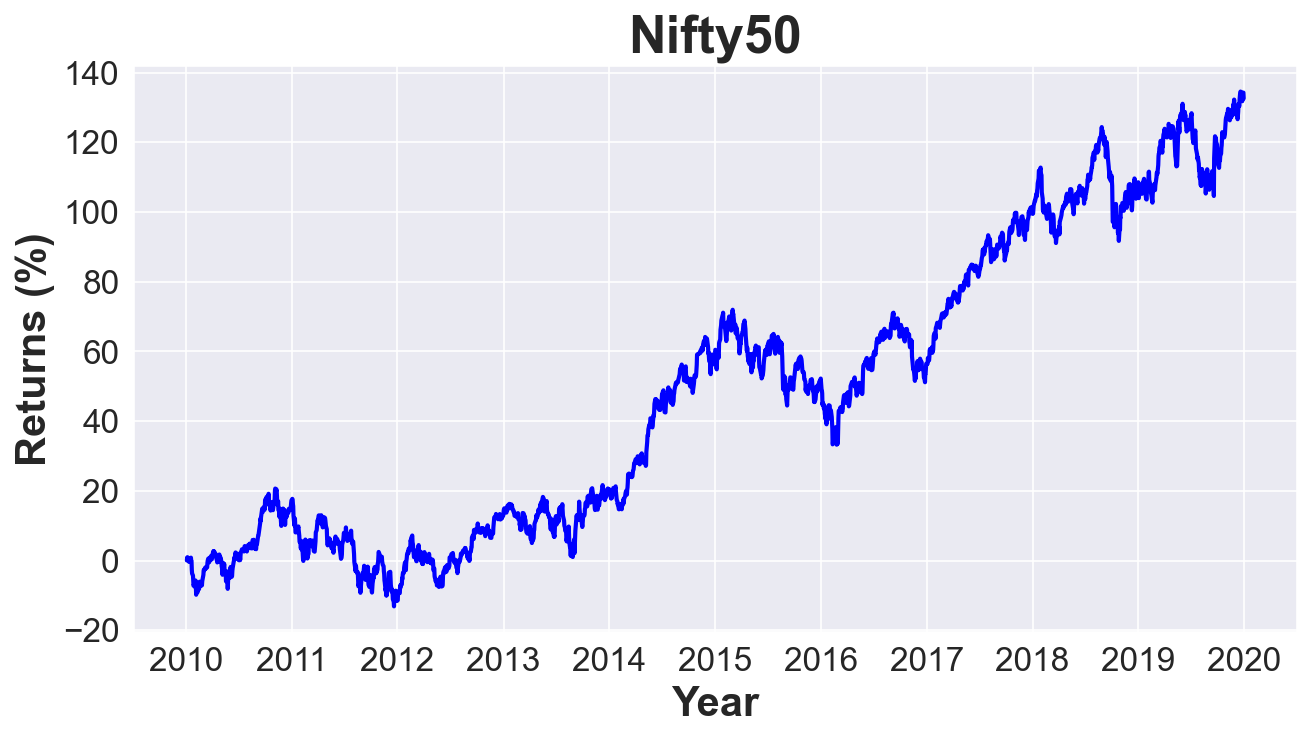

In [7]:
nifty_df.set_index('date')[['Nifty50_returns']].plot(color='blue', figsize=(10, 5), legend=False)
plot_chart(title="Nifty50", title_size=25,
           ylabel="Returns (%)", ylabel_size=20, yticks_size=16,
           xlabel="Year", xlabel_size=20, xticks_size=16,
           legend=False)

##### Nifty Yearly Returns

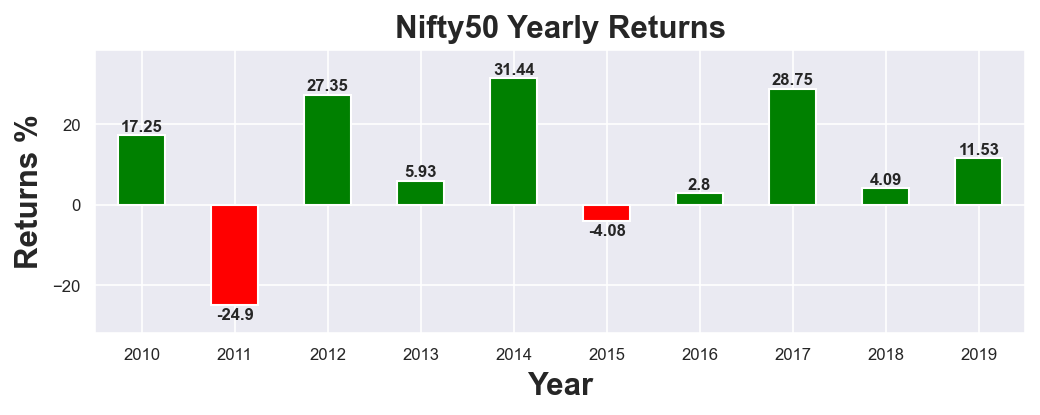

In [8]:
analysis_df_1 = nifty_df.sort_values('date').copy()

## year
analysis_df_1["year"] = analysis_df_1["date"].apply(lambda x: x.year)

##
analysis_df_1 = analysis_df_1.groupby(['year'])['Nifty50_close'].agg(['first','last']).reset_index()
analysis_df_1["returns"] = analysis_df_1.apply(lambda x: return_(x['first'], x['last']), axis=1)
analysis_df_1['positive'] = analysis_df_1['returns'] > 0

## plotting
ax = analysis_df_1.set_index('year')['returns'].plot(kind='bar', color=analysis_df_1.positive.map({True: 'g', False: 'r'}), figsize=(8, 2.5))

## labelling
rects = ax.patches
labels = analysis_df_1['returns'].values
for rect, label in zip(rects, labels):
    if (label>=0):
        ax.text(rect.get_x() + rect.get_width() / 2, label + 1, label, ha='center', fontweight='bold', fontsize=8)
    else:
        ax.text(rect.get_x() + rect.get_width() / 2, label - 3.6, label, ha='center', fontweight='bold', fontsize=8)
plt.ylim(min(labels)-7, max(labels)+7)
plot_chart(title="Nifty50 Yearly Returns", title_size=15,
           ylabel="Returns %", ylabel_size=15, yticks_size=8,
           xlabel="Year", xlabel_size=15, xticks_size=8)

##### Nifty Monthly Returns

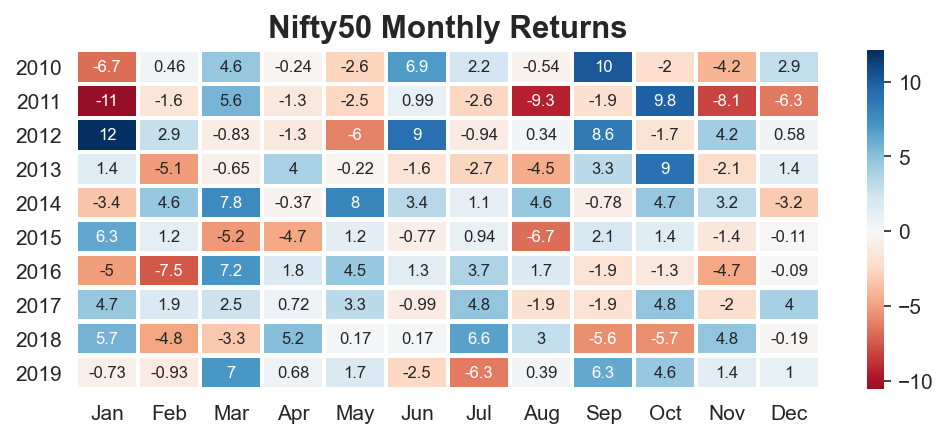

In [9]:
analysis_df_2 = nifty_df.sort_values('date').copy()
## 1. year
analysis_df_2["year"] = analysis_df_2["date"].apply(lambda x: x.year)

## 2. month
analysis_df_2["month"] = analysis_df_2["date"].apply(lambda x: x.strftime("%b"))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
analysis_df_2['month'] = pd.Categorical(analysis_df_2['month'], months)

##
analysis_df_2 = analysis_df_2.groupby(['year', 'month'])['Nifty50_close'].agg(['first','last']).reset_index()
analysis_df_2["returns"] = analysis_df_2.apply(lambda x: return_(x['first'], x['last']), axis=1)
analysis_df_2['positive'] = analysis_df_2['returns'] > 0

## plotting
analysis_df_2_pivot = analysis_df_2.pivot_table(index='year', columns='month', values='returns', aggfunc='sum')

sns.heatmap(analysis_df_2_pivot,
            center=0,
            linewidths=1.5,
            cmap="RdBu",
            annot=True, annot_kws={'size':8})
plot_chart(title="Nifty50 Monthly Returns", title_size=15)

#### Nifty50 vs Major World Indexes

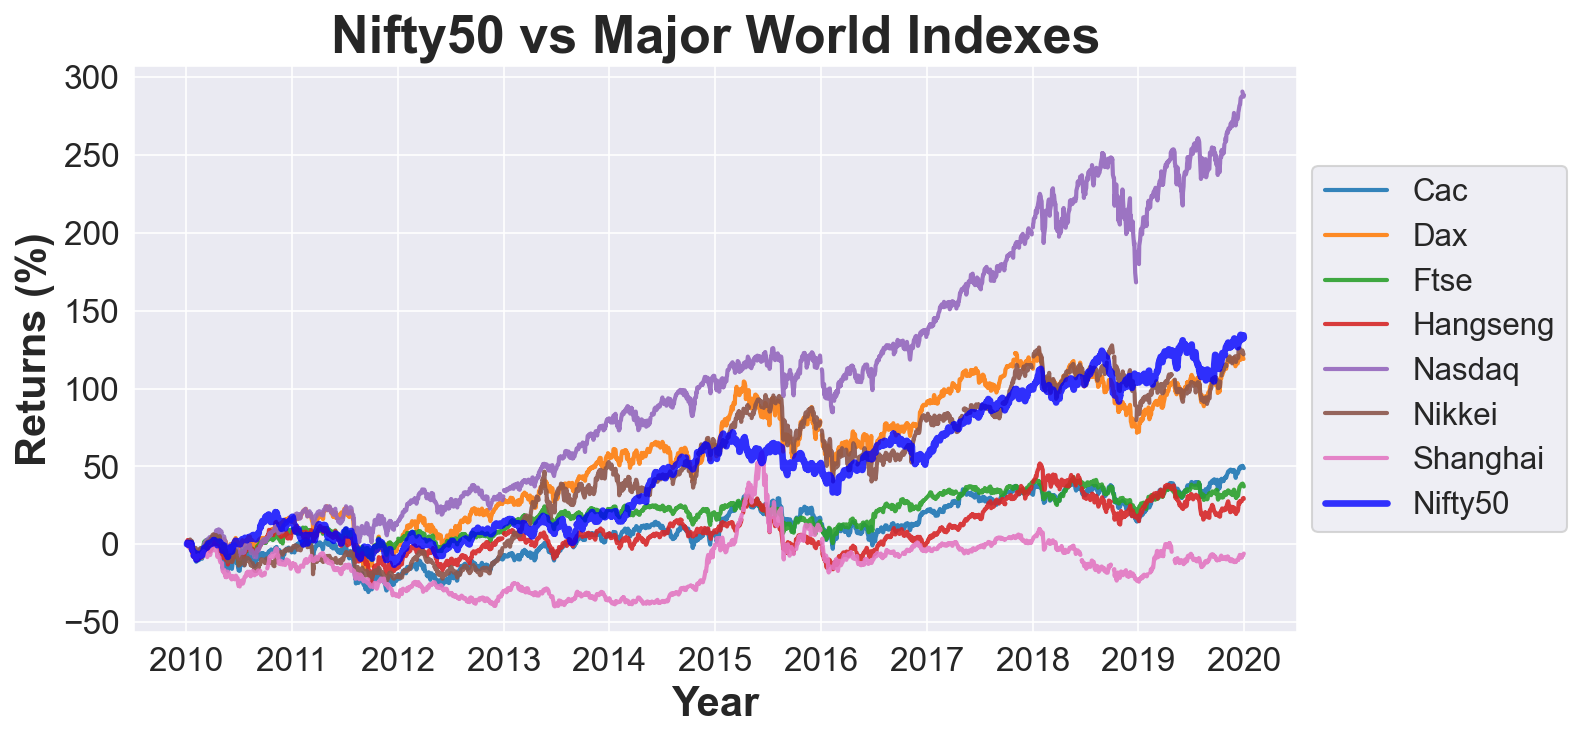

In [7]:
analysis_df = indexes_df[["Nifty50_returns"] + [index+"_returns" for index in world_indexes]]

## renaming columns
analysis_df.columns = [(col.split("_")[0]).capitalize() for col in analysis_df.columns]
analysis_df = analysis_df[sorted(analysis_df.columns)]

ax = analysis_df.drop("Nifty50", axis=1).plot(alpha=0.9, figsize=(10, 5))
analysis_df[['Nifty50']].plot(color='blue', ax=ax, linewidth=3.2, alpha=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plot_chart(title="Nifty50 vs Major World Indexes", title_size=25,
           ylabel="Returns (%)", ylabel_size=20, yticks_size=16,
           xlabel="Year", xlabel_size=20, xticks_size=16)

In [10]:
index_country_mapping = {"Nasdaq":"United States",
                         "Nikkei":"Japan",
                         "Nifty50":"India",
                         "Dax":"Germany",
                         "Cac":"France",
                         "Ftse":"United Kingdom",
                         "HangSeng":"Hong Kong",
                         "Shanghai":"China"}

In [11]:
analysis_df_2 = returns_df[returns_df['Index'].isin(world_indexes+['Nifty50'])].reset_index(drop=True)
analysis_df_2["Country"] = analysis_df_2["Index"].apply(lambda x: index_country_mapping[x])
analysis_df_2 = analysis_df_2[['Index', 'Country', 'Absolute Returns (%)', 'CAGR', 'Correlation (Nifty50)', 'Volatility (%)']]
analysis_df_2.style.apply(nifty_color, axis=1)

,Index,Country,Absolute Returns (%),CAGR,Correlation (Nifty50),Volatility (%)
0,Nasdaq,United States,288.690000,14.540000,0.240282,1.070000
1,Nifty50,India,132.570000,8.810000,1.000000,0.970000
2,Nikkei,Japan,122.030000,8.300000,0.317413,1.300000
3,Dax,Germany,119.050000,8.160000,0.387770,1.190000
4,Cac,France,48.930000,4.060000,0.393906,1.220000
5,Ftse,United Kingdom,37.130000,3.210000,0.405857,0.930000
6,HangSeng,Hong Kong,29.170000,2.590000,0.488736,1.140000
7,Shanghai,China,-5.970000,-0.610000,0.220788,1.350000


#### Nifty50 vs Sensex

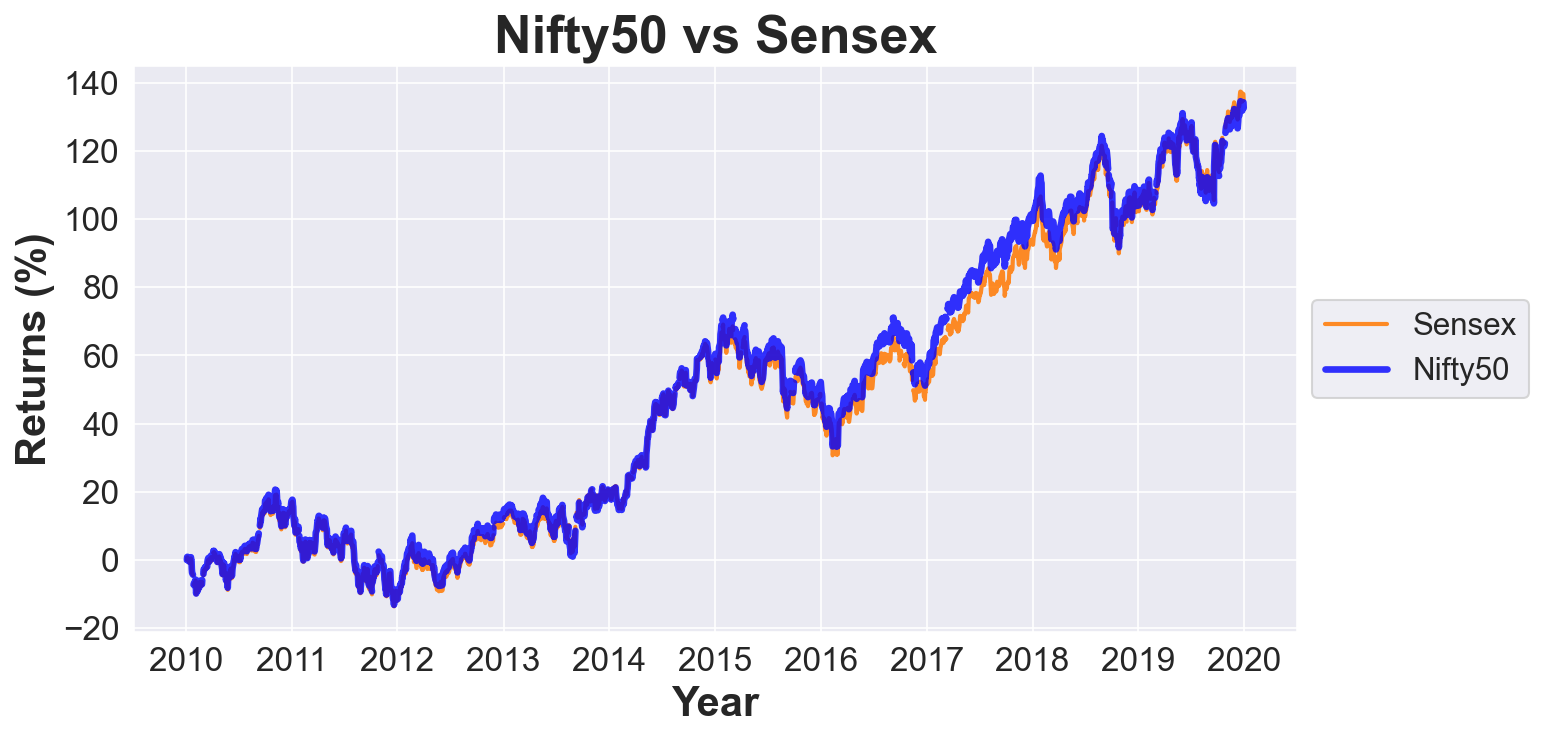

In [13]:
analysis_df = indexes_df[["Nifty50_returns"] + [index+"_returns" for index in indian_indexes]]

## renaming columns
analysis_df.columns = [(col.split("_")[0]).capitalize() for col in analysis_df.columns]
analysis_df = analysis_df[sorted(analysis_df.columns)]

ax = analysis_df.drop("Nifty50", axis=1).plot(alpha=0.9, figsize=(10, 5), color=['tab:orange'])
analysis_df[['Nifty50']].plot(color='blue', ax=ax, linewidth=3.2, alpha=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plot_chart(title="Nifty50 vs Sensex", title_size=25,
           ylabel="Returns (%)", ylabel_size=20, yticks_size=16,
           xlabel="Year", xlabel_size=20, xticks_size=16)

In [14]:
analysis_df_2 = returns_df[returns_df['Index'].isin(indian_indexes+['Nifty50'])].reset_index(drop=True)
analysis_df_2.style.apply(nifty_color, axis=1)

,Index,Absolute Returns (%),CAGR,Correlation (Nifty50),Volatility (%)
0,Sensex,134.950000,8.920000,0.989195,0.960000
1,Nifty50,132.570000,8.810000,1.000000,0.970000


#### Nifty Sector Indexes Performance

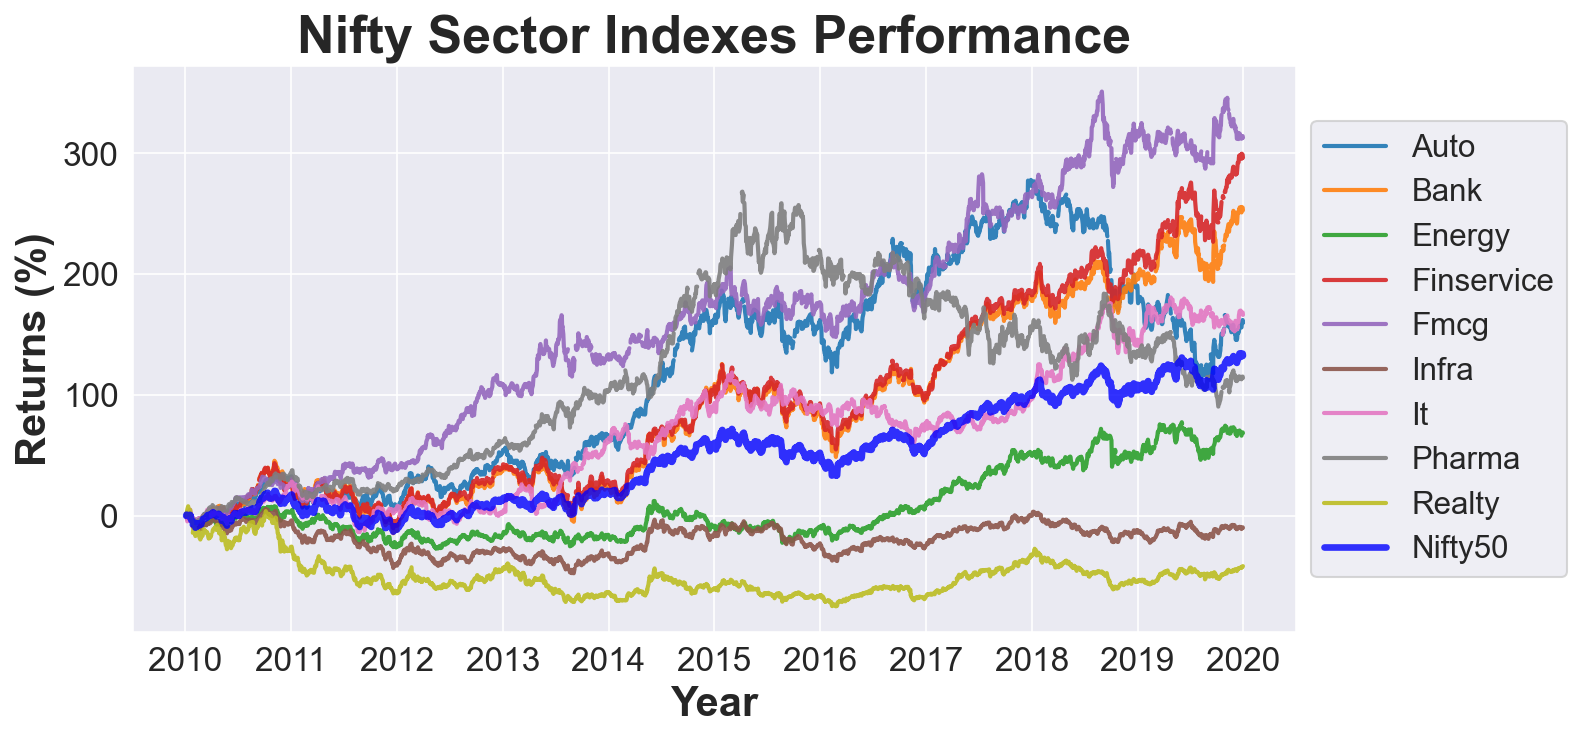

In [15]:
analysis_df = indexes_df[["Nifty50_returns"] + [index+"_returns" for index in sector_indexes]]

## renaming columns
analysis_df.columns = [(col.split("_")[0]).capitalize() for col in analysis_df.columns]
analysis_df = analysis_df[sorted(analysis_df.columns)]

ax = analysis_df.drop("Nifty50", axis=1).plot(alpha=0.9, figsize=(10, 5))
analysis_df[['Nifty50']].plot(color='blue', ax=ax, linewidth=3.2, alpha=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plot_chart(title="Nifty Sector Indexes Performance", title_size=25,
           ylabel="Returns (%)", ylabel_size=20, yticks_size=16,
           xlabel="Year", xlabel_size=20, xticks_size=16)

In [16]:
analysis_df_2 = returns_df[returns_df['Index'].isin(sector_indexes+['Nifty50'])].reset_index(drop=True)
analysis_df_2.style.apply(nifty_color, axis=1)

,Index,Absolute Returns (%),CAGR,Correlation (Nifty50),Volatility (%)
0,FMCG,312.990000,15.240000,0.618707,1.030000
1,FinService,296.460000,14.770000,0.900805,1.300000
2,Bank,252.950000,13.440000,0.879306,1.380000
3,IT,166.320000,10.290000,0.515300,1.230000
4,Auto,159.680000,10.010000,0.797273,1.240000
5,Nifty50,132.570000,8.810000,1.000000,0.970000
6,Pharma,114.160000,7.910000,0.525401,1.100000
7,Energy,68.500000,5.360000,0.778057,1.200000
8,Infra,-9.940000,-1.040000,0.841558,1.250000
9,Realty,-41.670000,-5.250000,0.702162,2.060000


#### Nifty50 vs Gold

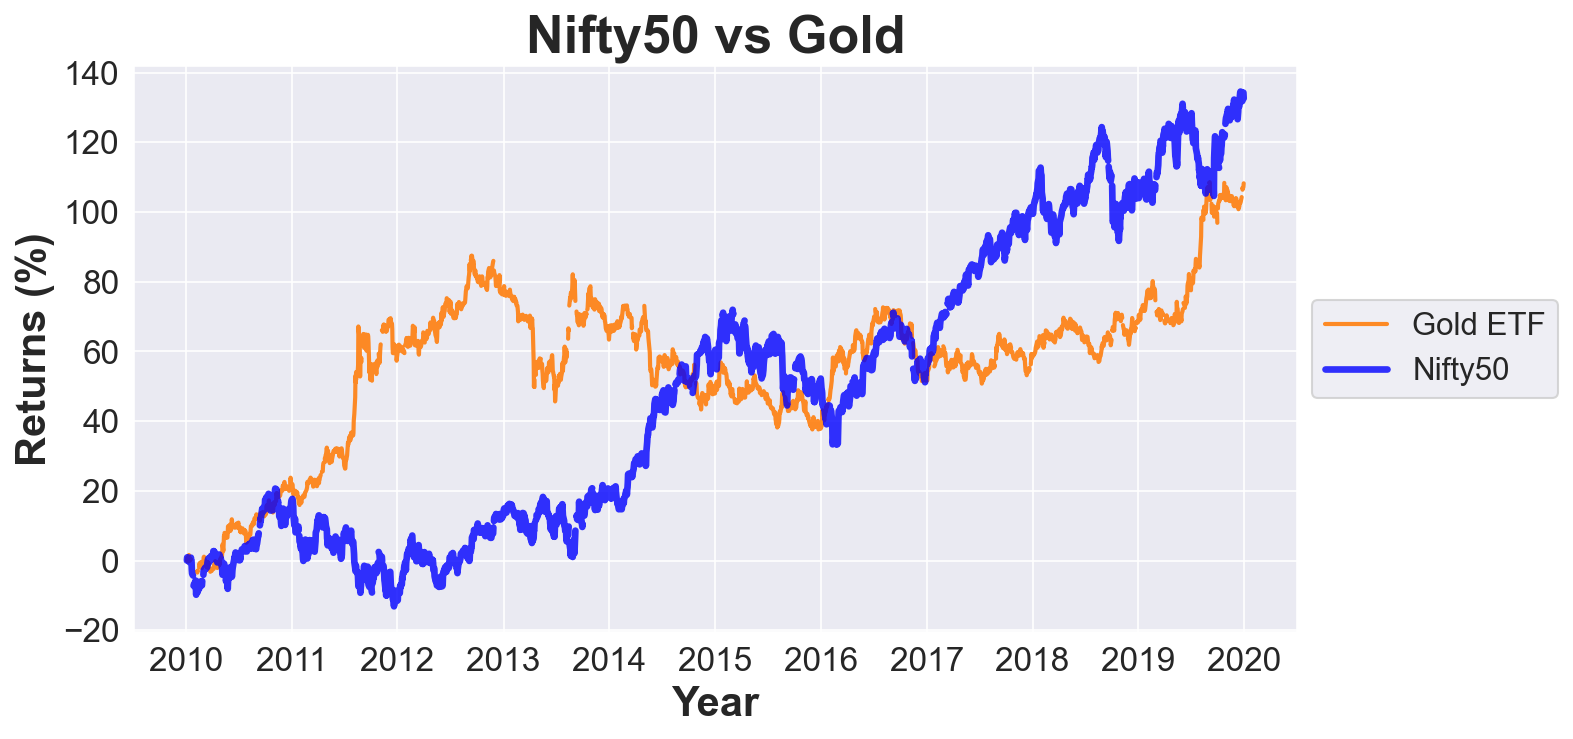

In [74]:
analysis_df = indexes_df[["Nifty50_returns"] + [index+"_returns" for index in gold_etf]]

## renaming columns
analysis_df.columns = [(col.split("_")[0]).capitalize() for col in analysis_df.columns]
analysis_df.rename(columns={"Sbigoldetf":"Gold ETF"}, inplace=True)
analysis_df = analysis_df[sorted(analysis_df.columns)]

ax = analysis_df.drop("Nifty50", axis=1).plot(alpha=0.9, figsize=(10, 5), color=['tab:orange'])
analysis_df[['Nifty50']].plot(color='blue', ax=ax, linewidth=3.2, alpha=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plot_chart(title="Nifty50 vs Gold", title_size=25,
           ylabel="Returns (%)", ylabel_size=20, yticks_size=16,
           xlabel="Year", xlabel_size=20, xticks_size=16)

In [75]:
analysis_df_2 = returns_df[returns_df['Index'].isin(gold_etf+['Nifty50'])].reset_index(drop=True)
analysis_df_2.style.apply(nifty_color, axis=1)

,Index,Absolute Returns (%),CAGR,Correlation (Nifty50),Volatility (%)
0,Nifty50,132.570000,8.810000,1.000000,0.970000
1,SBIGoldETF,108.220000,7.610000,-0.123188,0.820000


#### Nifty Market Capitalization-based Indexes Performance

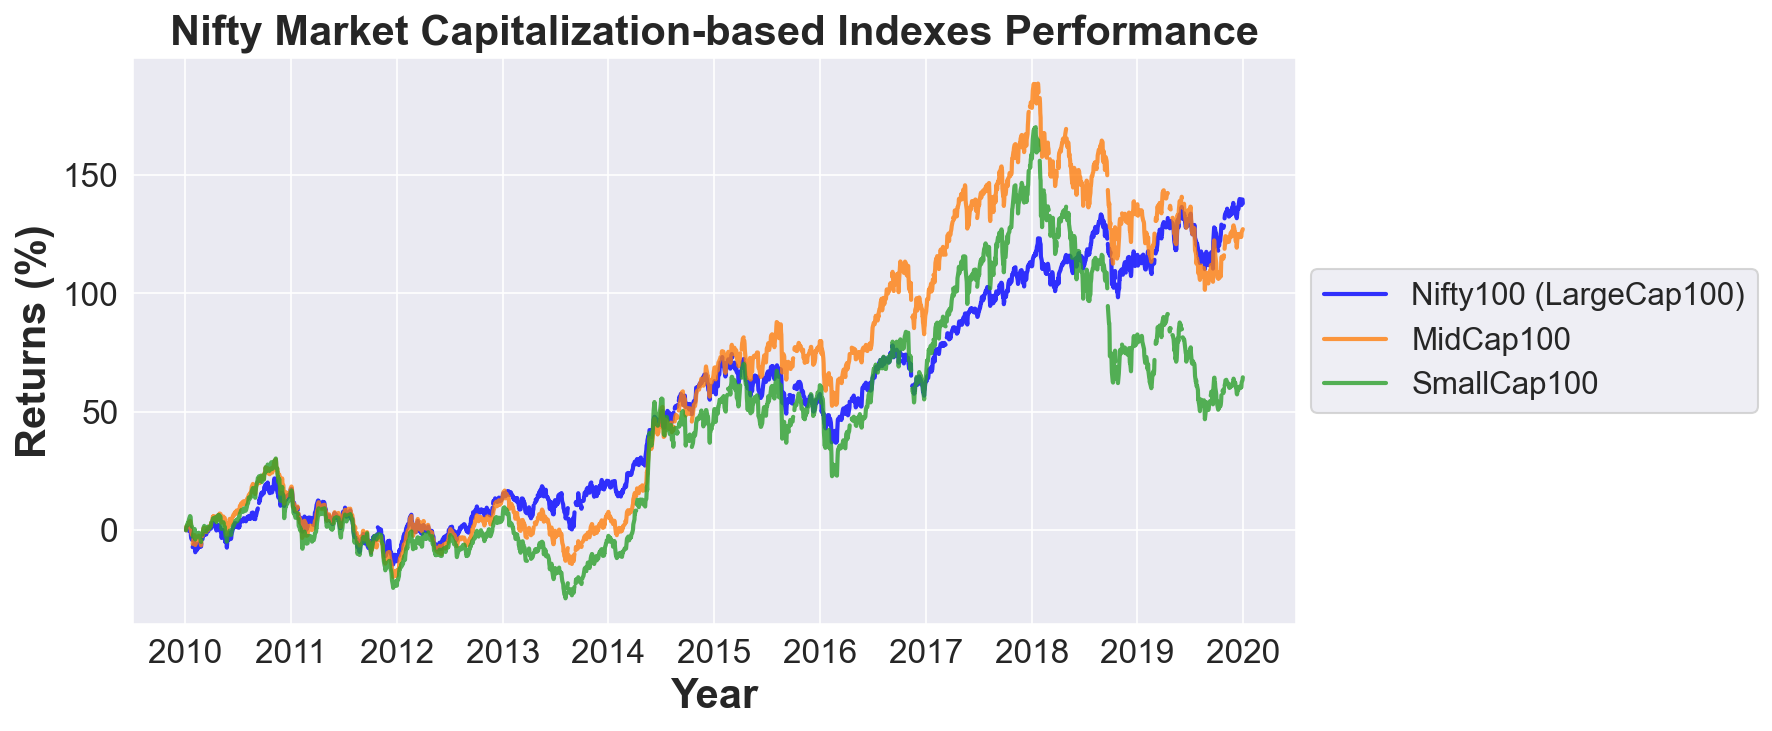

In [76]:
analysis_df = indexes_df[["Nifty100_returns"] + [index+"_returns" for index in market_cap_indexes]]

## renaming columns
analysis_df.columns = [(col.split("_")[0]) for col in analysis_df.columns]
analysis_df.rename(columns={"Nifty100":"Nifty100 (LargeCap100)"}, inplace=True)

analysis_df[["Nifty100 (LargeCap100)", "MidCap100", "SmallCap100"]].plot(alpha=0.8, figsize=(10, 5), color=['blue', 'tab:orange', "tab:green"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plot_chart(title="Nifty Market Capitalization-based Indexes Performance", title_size=20,
           ylabel="Returns (%)", ylabel_size=20, yticks_size=16,
           xlabel="Year", xlabel_size=20, xticks_size=16)

In [78]:
analysis_df_2 = returns_df[returns_df['Index'].isin(market_cap_indexes+['Nifty100'])].reset_index(drop=True)
analysis_df_2.style.apply(nifty_color, axis=1)

,Index,Absolute Returns (%),CAGR,Correlation (Nifty50),Volatility (%)
0,Nifty100,138.040000,9.060000,0.995759,0.960000
1,MidCap100,127.170000,8.550000,0.829488,1.080000
2,SmallCap100,64.600000,5.110000,0.758639,1.240000


#### Nifty Broad Market Indexes Performance

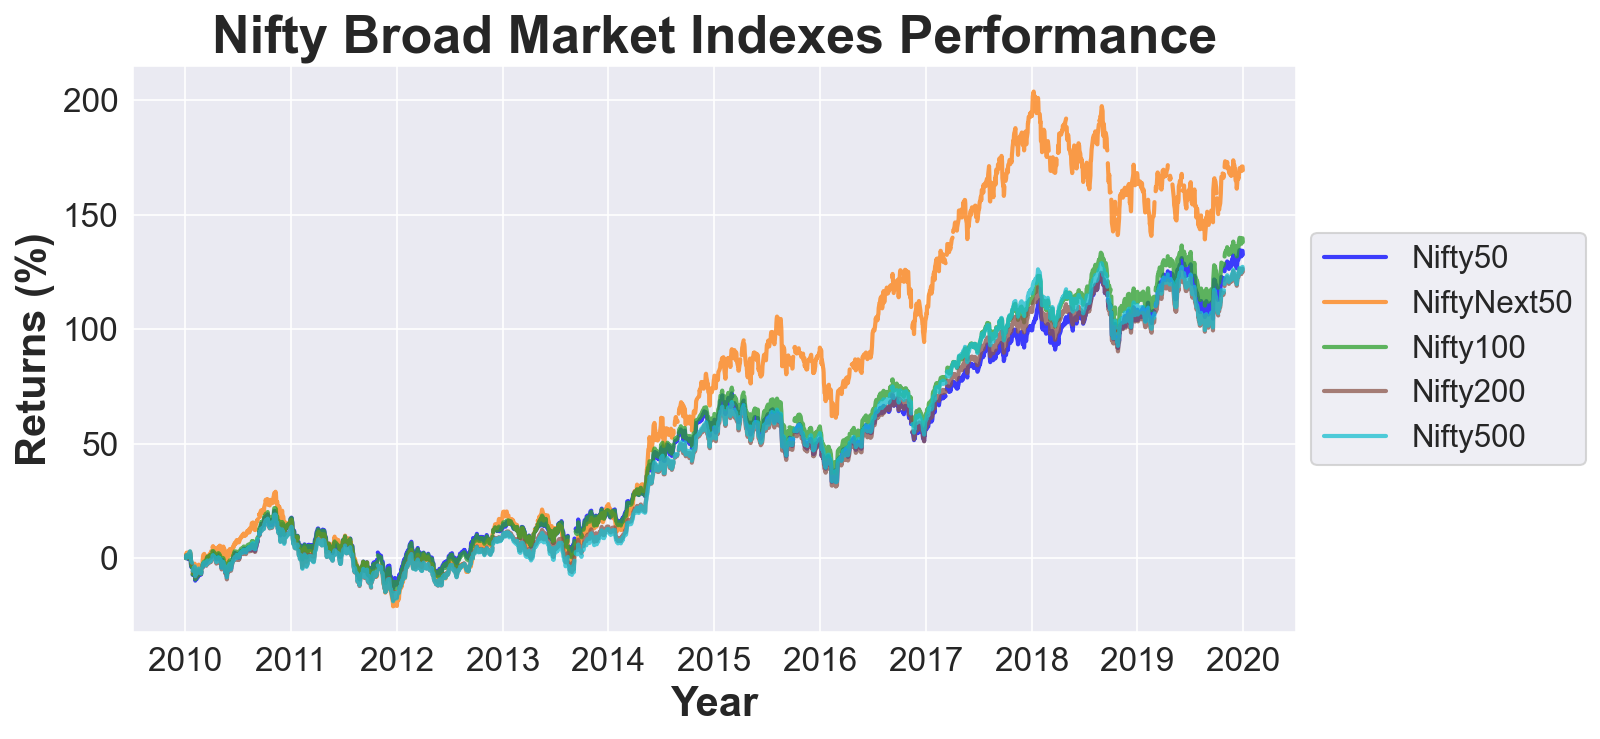

In [79]:
analysis_df = indexes_df[["Nifty50_returns"] + [index+"_returns" for index in nifty_indexes]]

## renaming columns
analysis_df.columns = [(col.split("_")[0]).capitalize() for col in analysis_df.columns]
analysis_df.rename(columns={"Niftynext50":"NiftyNext50"}, inplace=True)
analysis_df = analysis_df[['Nifty50', 'NiftyNext50', 'Nifty100', 'Nifty200', 'Nifty500']]

ax = analysis_df.plot(alpha=0.75, figsize=(10, 5), color=['Blue', 'tab:orange', 'tab:green', 'tab:brown', 'tab:cyan'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plot_chart(title="Nifty Broad Market Indexes Performance", title_size=25,
           ylabel="Returns (%)", ylabel_size=20, yticks_size=16,
           xlabel="Year", xlabel_size=20, xticks_size=16)

In [81]:
analysis_df_2 = returns_df[returns_df['Index'].isin(nifty_indexes+["Nifty50"])].reset_index(drop=True)
analysis_df_2.style.apply(nifty_color, axis=1)

,Index,Absolute Returns (%),CAGR,Correlation (Nifty50),Volatility (%)
0,NiftyNext50,169.390000,10.420000,0.842687,1.070000
1,Nifty100,138.040000,9.060000,0.995759,0.960000
2,Nifty50,132.570000,8.810000,1.000000,0.970000
3,Nifty500,126.040000,8.500000,0.981112,0.950000
4,Nifty200,125.050000,8.450000,0.988666,0.960000


#### Nifty50 vs Niftri

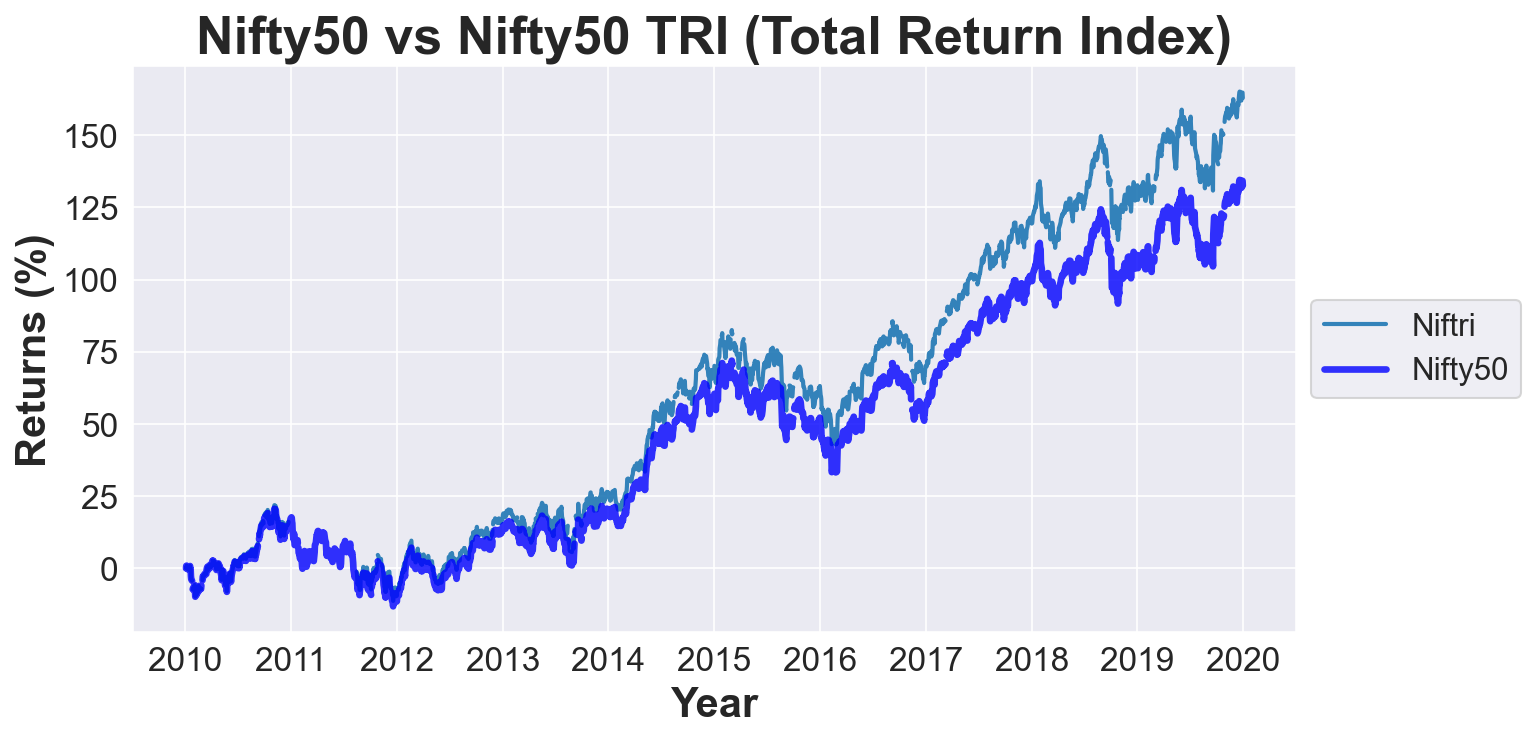

In [82]:
analysis_df = indexes_df[["Nifty50_returns"] + [index+"_returns" for index in nifty_tri_index]]

## renaming columns
analysis_df.columns = [(col.split("_")[0]).capitalize() for col in analysis_df.columns]
analysis_df = analysis_df[sorted(analysis_df.columns)]

ax = analysis_df.drop("Nifty50", axis=1).plot(alpha=0.9, figsize=(10, 5))
analysis_df[['Nifty50']].plot(color='blue', ax=ax, linewidth=3.2, alpha=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plot_chart(title="Nifty50 vs Nifty50 TRI (Total Return Index)", title_size=25,
           ylabel="Returns (%)", ylabel_size=20, yticks_size=16,
           xlabel="Year", xlabel_size=20, xticks_size=16)

In [83]:
analysis_df_2 = returns_df[returns_df['Index'].isin(nifty_tri_index+["Nifty50"])].reset_index(drop=True)
analysis_df_2.style.apply(nifty_color, axis=1)

,Index,Absolute Returns (%),CAGR,Correlation (Nifty50),Volatility (%)
0,Niftri,162.900000,10.150000,0.947230,1.010000
1,Nifty50,132.570000,8.810000,1.000000,0.970000


#### References

##### data sources
- https://www.investing.com/indices/
- https://www.niftyindices.com/reports/historical-data
- https://in.finance.yahoo.com/ 

##### articles, blogs
- https://www.kaggle.com/sudalairajkumar/nifty-indices-dataset/kernels
- https://www.kaggle.com/parulpandey/nifty-data-eda
- https://stableinvestor.com/2018/01/nifty-annual-yearly-returns-historical.html
- https://stableinvestor.com/2017/10/nifty-monthly-returns.html
- https://grow.acorns.com/stock-market-remarkable-decade-in-10-numbers/
- https://groww.in/blog/what-are-indexes-stock-markets/

In [ ]:
#no